In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
BASE_DIR = "/Users/akshatha/GeorgakopoulosSoaresLab/g4_analysis"
SPECIES_DATA = f"{BASE_DIR}/results/species_data.csv"
G4_PATH = f"{BASE_DIR}/results/g4hunter_g4_distribution.csv"
REG_PATH = f"{BASE_DIR}/results/regex_g4_distribution.csv"

def get_domain(taxa):
    if taxa == 'viral':
        return 'Virus'
    elif taxa == 'bacteria':
        return 'Bacteria'
    elif taxa == 'archaea':
        return 'Archaea'
    else:
        return 'Eukaryota'    

# set color map for domains
color_map = {
    'Virus': '#66c2a5',
    'Bacteria': '#fc8d62',
    'Eukaryota': '#8da0cb',
    'Archaea': '#e78ac3'
}

In [32]:
# read species data
df_species = pd.read_csv(f"{BASE_DIR}/results/species_data.csv")
df_species = df_species[["Accession", "Genome Size", "GC Percentage", "Taxa"]]
df_species = df_species.replace('na', np.nan)
df_species["GC Percentage"] = df_species["GC Percentage"].astype(float)
df_species["Genome Size"] = df_species["Genome Size"].astype(float)
df_species["Domain"] = df_species["Taxa"].apply(get_domain)
df_species.head()

,Accession,Genome Size,GC Percentage,Taxa,Domain
0,GCA_000002515.1,10689156.0,38.5,fungi,Eukaryota
1,GCA_031844645.1,6733472.0,61.0,bacteria,Bacteria
2,GCA_958295725.1,3665566.0,67.0,bacteria,Bacteria
3,GCA_000002765.3,23292622.0,19.0,protozoa,Eukaryota
4,GCA_000006645.1,4701745.0,47.5,bacteria,Bacteria


In [33]:
# read g4 data
df_g4 = pd.read_csv(G4_PATH)
df_g4 = df_g4[["accession", "g4_count", "total_g4_length"]]
df_g4 = df_g4.rename(columns={"accession": "Accession"})
df_g4["g4_count"] = df_g4["g4_count"].astype(float)
df_g4["total_g4_length"] = df_g4["total_g4_length"].astype(float)

# merge with species data
df_g4 = pd.merge(df_g4, df_species, on="Accession")
df_g4["G4 Density (per Mb)"] = df_g4["g4_count"] / df_g4["Genome Size"] * 1000000
df_g4["GC Corrected G4 Density (per Mb)"] = df_g4["G4 Density (per Mb)"] / (df_g4["GC Percentage"] / 50)
df_g4.head()

# filter out metagenomes and other taxa as they are not relevant for domain level analysis
df_g4 = df_g4[df_g4["Taxa"] != "metagenomes"]
df_g4 = df_g4[df_g4["Taxa"] != "other"]

df_g4["Method"] = "G4Hunter"
df_g4.head()

,Accession,g4_count,total_g4_length,Genome Size,GC Percentage,Taxa,Domain,G4 Density (per Mb),GC Corrected G4 Density (per Mb),Method
0,GCA_000002515.1,356.0,11512.0,10689156.0,38.5,fungi,Eukaryota,33.304781,43.252962,G4Hunter
1,GCA_000002765.3,438.0,15119.0,23292622.0,19.0,protozoa,Eukaryota,18.804238,49.484836,G4Hunter
2,GCA_000002985.3,11196.0,406037.0,100272607.0,35.0,invertebrate,Eukaryota,111.655619,159.508027,G4Hunter
3,GCA_000006605.1,909.0,28761.0,2476822.0,61.0,bacteria,Bacteria,367.002554,300.821766,G4Hunter
4,GCA_000006645.1,765.0,23973.0,4701745.0,47.5,bacteria,Bacteria,162.705549,171.268999,G4Hunter


In [34]:
# read regex data
df_reg = pd.read_csv(REG_PATH)
df_reg = df_reg[["accession", "g4_count", "total_g4_length"]]
df_reg = df_reg.rename(columns={"accession": "Accession"})
df_reg["g4_count"] = df_reg["g4_count"].astype(float)
df_reg["total_g4_length"] = df_reg["total_g4_length"].astype(float)

# merge with species data
df_reg = pd.merge(df_reg, df_species, on="Accession")
df_reg["G4 Density (per Mb)"] = df_reg["g4_count"] / df_reg["Genome Size"] * 1000000
df_reg["GC Corrected G4 Density (per Mb)"] = df_reg["G4 Density (per Mb)"] / (df_reg["GC Percentage"] / 50)
df_reg.head()

# filter out metagenomes and other taxa as they are not relevant for domain level analysis
df_reg = df_reg[df_reg["Taxa"] != "metagenomes"]
df_reg = df_reg[df_reg["Taxa"] != "other"]

df_reg["Method"] = "Consensus Motifs"
df_reg.head()

,Accession,g4_count,total_g4_length,Genome Size,GC Percentage,Taxa,Domain,G4 Density (per Mb),GC Corrected G4 Density (per Mb),Method
0,GCA_000002515.1,36.0,890.0,10689156.0,38.5,fungi,Eukaryota,3.367899,4.373895,Consensus Motifs
1,GCA_000002765.3,837.0,20268.0,23292622.0,19.0,protozoa,Eukaryota,35.934125,94.563488,Consensus Motifs
2,GCA_000002985.3,2372.0,54608.0,100272607.0,35.0,invertebrate,Eukaryota,23.655513,33.793591,Consensus Motifs
3,GCA_000006605.1,154.0,4017.0,2476822.0,61.0,bacteria,Bacteria,62.176450,50.964304,Consensus Motifs
4,GCA_000006645.1,66.0,1652.0,4701745.0,47.5,bacteria,Bacteria,14.037341,14.776149,Consensus Motifs


In [35]:
# combine g4 and regex data
df_combined = pd.concat([df_g4, df_reg])
df_combined.head(10)

,Accession,g4_count,total_g4_length,Genome Size,GC Percentage,Taxa,Domain,G4 Density (per Mb),GC Corrected G4 Density (per Mb),Method
0,GCA_000002515.1,356.0,11512.0,10689156.0,38.5,fungi,Eukaryota,33.304781,43.252962,G4Hunter
1,GCA_000002765.3,438.0,15119.0,23292622.0,19.0,protozoa,Eukaryota,18.804238,49.484836,G4Hunter
2,GCA_000002985.3,11196.0,406037.0,100272607.0,35.0,invertebrate,Eukaryota,111.655619,159.508027,G4Hunter
3,GCA_000006605.1,909.0,28761.0,2476822.0,61.0,bacteria,Bacteria,367.002554,300.821766,G4Hunter
4,GCA_000006645.1,765.0,23973.0,4701745.0,47.5,bacteria,Bacteria,162.705549,171.268999,G4Hunter
5,GCA_000006685.1,133.0,4216.0,1080451.0,40.0,bacteria,Bacteria,123.096744,153.870930,G4Hunter
6,GCA_000006905.1,1529.0,48968.0,4016947.0,67.0,bacteria,Bacteria,380.637335,284.057713,G4Hunter
7,GCA_000006945.2,418.0,12666.0,4951383.0,52.0,bacteria,Bacteria,84.420858,81.173902,G4Hunter
8,GCA_000007005.1,261.0,8369.0,2992245.0,35.5,archaea,Archaea,87.225478,122.852786,G4Hunter
9,GCA_000007045.1,29.0,832.0,2038615.0,39.5,bacteria,Bacteria,14.225344,18.006765,G4Hunter


/var/folders/qb/4ylt6z0d6tb4k4dfqtp35dbh0000gn/T/ipykernel_78883/584051803.py:25: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0].set_color(color_map["Eukaryota"])
/var/folders/qb/4ylt6z0d6tb4k4dfqtp35dbh0000gn/T/ipykernel_78883/584051803.py:26: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1].set_color(color_map["Archaea"])
/var/folders/qb/4ylt6z0d6tb4k4dfqtp35dbh0000gn/T/ipykernel_78883/584051803.py:27: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[2].set_color(color_map["Bacteria"])
/var/folders/qb/4ylt6z0d6tb4k4dfqtp35dbh0000gn/T/ipykernel_78883/584051803.py:28: 

<Figure size 600x600 with 0 Axes>

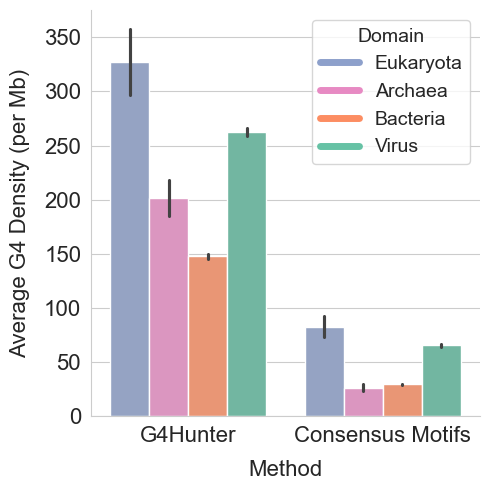

In [40]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))

sns.catplot(
    data=df_combined, 
    kind="bar",
    x="Method", 
    y="G4 Density (per Mb)", 
    hue="Domain",
    palette=color_map,
    hue_order=["Eukaryota", "Archaea", "Bacteria", "Virus"],
    legend=False
)

# create legend
plt.legend(
    title="Domain", 
    loc="upper right", 
    labels=["Eukaryota", "Archaea", "Bacteria", "Virus"],
    fontsize=14,
    title_fontsize=14
)
# add color patches to legend
legend = plt.gca().get_legend()
legend.legendHandles[0].set_color(color_map["Eukaryota"])
legend.legendHandles[1].set_color(color_map["Archaea"])
legend.legendHandles[2].set_color(color_map["Bacteria"])
legend.legendHandles[3].set_color(color_map["Virus"])
for i in range(4):
    legend.legendHandles[i].set_linewidth(5)

# formatting
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Method", fontsize=16, labelpad=10)
plt.ylabel("Average G4 Density (per Mb)", fontsize=16, labelpad=10)
plt.tight_layout()

plt.savefig(f"{BASE_DIR}/plots/g4_density_domain_combined.png")